# **Que1.**

# 1.

a. Auto encoders can be used in compressing images such that the image gets compressed by the encoder and then gets decoded and from the latent space it will get transferred again to the original image. This way we can send pictures faster and without taking up much space.

b. The second use of this technology is for the general reduction of the dimensions of any given file. These low-dimensional features are extracted by the encoder and then the data is reconstructed from the latent space using the decoder. This application is useful for analyzing complex data and extracting meaningful patterns.

c. One of the other applications of the autoencoder is for noise cancelation, in a way when you get the sound of something the encoder only gets the important parts (low-dimensional features) and after decoding it, it is trained in a way that will remove the noises that aren't part of the things that people want to hear.

# 2.
One of the key parts of the auto-encoders is the latent space that the auto encoders have. The clarity of each image is directly dependent on the latent space size, meaning the latent must have enough space to store the important data of the image, file, or whatever we are encoding and then decoding.

If the size of the latent space is too small, it may not capture all the essential features required for accurate reconstruction of the images. The bigger the latent space is the better the quality of the image we reconstructed will be.

To improve the quality of the reconstructed images, it's important to optimize the size and quality of the latent space to ensure that it retains the necessary information for accurate image reconstruction. This optimization process involves finding the right balance between the dimensionality of the latent space and its ability to capture and represent the essential features of the input data.

# 3.



a/

In [48]:
from keras.datasets import mnist
(_, _) , (test_images, _) = mnist.load_data()
test_images = test_images.reshape(test_images.shape[0], -1)
test_images = test_images.astype('float32') / 255.0

b/

In [49]:
# from google.colab import files
# uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import tensorflow as tf
autoencoder = tf.keras.models.load_model('/content/drive/My Drive/mnist_AE.h5')
reconstructed_images = autoencoder.predict(test_images)

313/313 [==============================] - 1s 4ms/step


c/
We showed 4 samples of test_images and the reconstructed_image of the corresponding test_image. We did it with the use of getting 4 random integers between 10000 and 0, and then we showed it using the matplotlib.pyplot library.

i:   2892
i:   7432
i:   8730
i:   3537


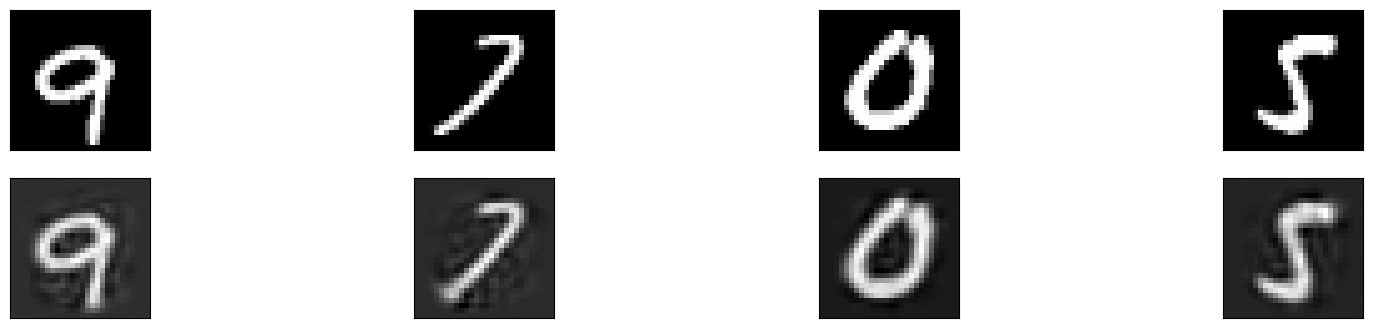

In [51]:
# test_images

import matplotlib.pyplot as plt
import random

# show original and reconstructed images
n = 4
plt.figure(figsize=(20, 4))
for i in range(n):
    # Test image
    ax = plt.subplot(2, n, i + 1)
    rand_num = random.randint(0, len(test_images) - 1)
    plt.imshow(test_images[rand_num].reshape(28, 28))

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[rand_num].reshape(28, 28))

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    print("i:  ", rand_num)
plt.show()

d/

1. We wrote a function to calculate the MSE.

2. We calculated all the MSE's.

3. We showed the histogram of all the MSEs.

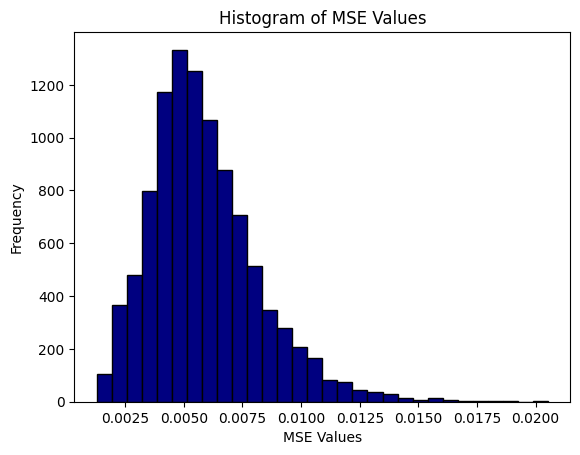

In [52]:
import numpy as np

# 1
def calc_mse(org, recons):
    error = org - recons
    mse = np.mean(np.square(error))
    return mse

# 2
mse_values = []
for i in range(len(test_images)):
    mse = calc_mse(test_images[i], reconstructed_images[i])
    mse_values.append(mse)

# 3
plt.hist(mse_values, bins=30, edgecolor='black', color='navy')
plt.xlabel('MSE Values')
plt.ylabel('Frequency')
plt.title('Histogram of MSE Values')
plt.show()

e/ Steps

1. Calculate the mean and the standard deviation of the MSEs.

2. put the mse_values(data) and the mean, std in the function and if the p_value is greater than 5% then we cannot reject the assumption, otherwise we do reject it.

In [53]:
mean_mse = np.mean(mse_values)
std_mse = np.std(mse_values)

from scipy import stats
ks_statistic, p_value = stats.kstest(mse_values, cdf='norm', args=(mean_mse, std_mse))


print(f"p_value:  {p_value}")
if p_value * 100 > 5:
    print(f"We can accept that the datas(the mse values) are a normal distribution with the parameters  mean={mean_mse} ,  std={std_mse}")
else:
    print("The assumption is rejected, thus the mse's aren't a normal distribution")

p_value:  4.538721695605657e-43
The assumption is rejected, thus the mse's aren't a normal distribution
